C:\Users\spide\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


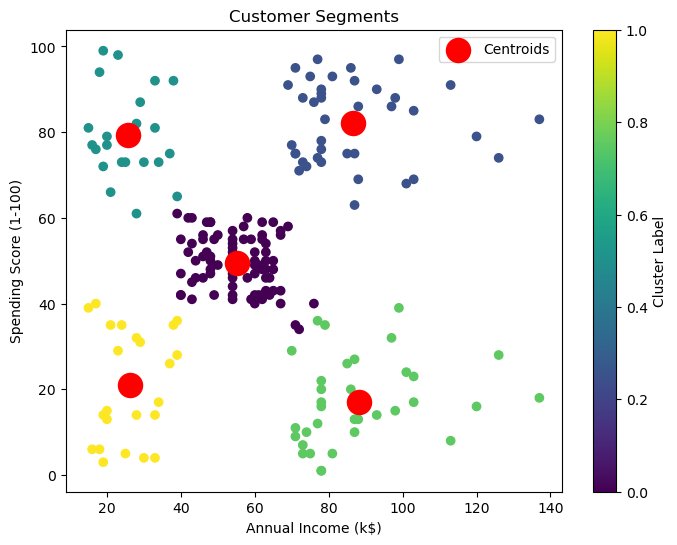

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   81.000000  81.000000           81.000000               81.000000   
mean    86.320988  42.716049           55.296296               49.518519   
std     24.240889  16.447822            8.988109                6.530909   
min     44.000000  18.000000           39.000000               34.000000   
25%     66.000000  27.000000           48.000000               44.000000   
50%     86.000000  46.000000           54.000000               50.000000   
75%    106.000000  54.000000           62.000000               55.000000   
max    143.000000  70.000000           76.000000               61.000000   

       Cluster_Labels  
count            81.0  
mean              0.0  
std               0.0  
min               0.0  
25%               0.0  
50%               0.0  
75%               0.0  
max               0.0  


Cluster 1:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \

In [12]:


import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the environment variable to avoid the memory leak
os.environ['OMP_NUM_THREADS'] = '1'

# Load the dataset
data = pd.read_csv(r'C:\Users\spide\OneDrive\Desktop\Mall_Customers.csv')

# Selecting features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Setting random_state for reproducibility
kmeans.fit(X)

# Add cluster labels to the original DataFrame
data['Cluster_Labels'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

# Analyze each cluster
for cluster in range(5):
    print(f"Cluster {cluster}:")
    cluster_data = data[data['Cluster_Labels'] == cluster]
    print(cluster_data.describe())
    print("\n")


In [8]:

print(data.head())
print(data.columns)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster_Labels  
0               4  
1               2  
2               4  
3               2  
4               4  
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_Labels'],
      dtype='object')


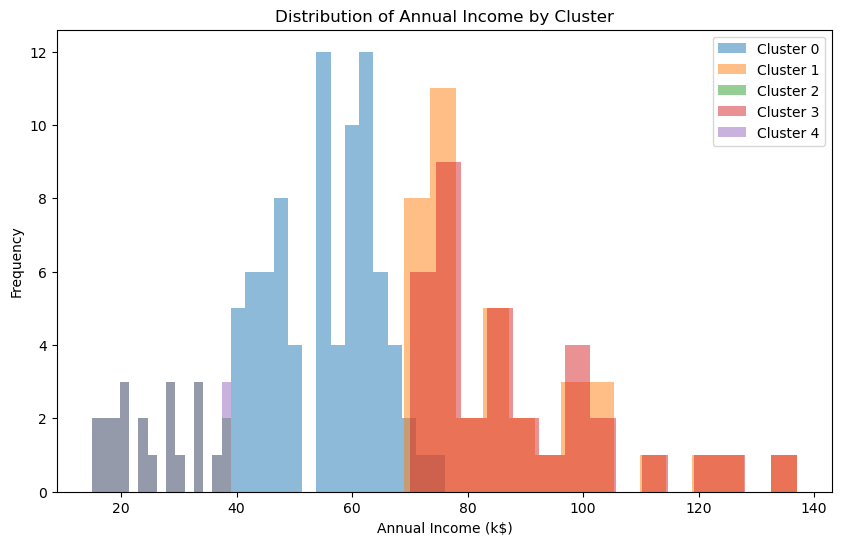

In [9]:

import matplotlib.pyplot as plt

# Example: Histogram of 'Annual Income (k$)' for each cluster
plt.figure(figsize=(10, 6))

# Iterate over clusters
for cluster in range(5):
    plt.hist(X[kmeans.labels_ == cluster]['Annual Income (k$)'], bins=15, alpha=0.5, label=f'Cluster {cluster}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income by Cluster')
plt.legend()
plt.show()


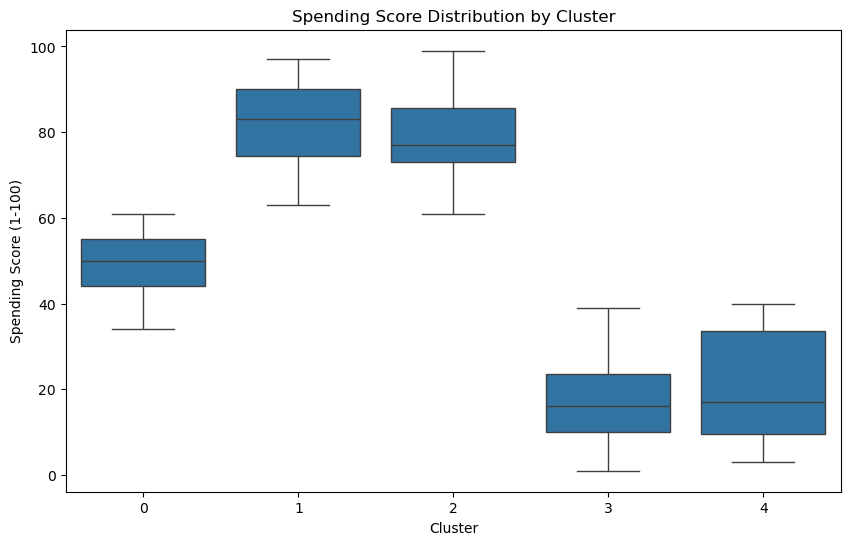

In [14]:
import seaborn as sns

# Example: Box plot of 'Spending Score (1-100)' for each cluster
plt.figure(figsize=(10, 6))

sns.boxplot(x=kmeans.labels_, y=X['Spending Score (1-100)'])
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score Distribution by Cluster')
plt.show()


In [13]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/294.9 kB 880.9 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
